In [1]:
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0
/usr/local/cuda/bin/nvcc


In [2]:
!nvidia-smi

Tue Dec  5 21:54:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/pip-install.py

# import cudf
# cudf.__version__

In [4]:
!pip install pyspark langchain sentence-transformers faiss-gpu llama-cpp-python transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 90.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.5 MB/s eta 0:00:00
  Created wheel 

In [5]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


https://www.toptal.com/data-science/graph-data-science-python-networkx



In [9]:
%cd /content/drive/Shareddrives/'DATA 245 Team 6'/Datasets/
%ls

/content/drive/Shareddrives/DATA 245 Team 6/Datasets
 amazon_products.pickle  'Dataset Links.gdoc'   rapidsai-csp-utils/  'review vector db'/
 dataset_for_modeling/    Movie_TV/            'raw files'/           word2vec/


In [6]:
import numpy as np
#%load_ext cudf.pandas
import pandas as pd
import csv
import sklearn
from sklearn import cluster
import networkx as nx
import scipy
from scipy.sparse.linalg import eigs, eigsh
import matplotlib
from matplotlib import pylab
from matplotlib import pyplot as plt
import glob
import random
import re
import nltk
#from stemming.porter2 import stem
from nltk.corpus import stopwords
import string
import json

# import cudf
# import cuml
import os
# import cugraph as cnx

In [10]:
Copurchase_Graph = nx.read_weighted_edgelist("dataset_for_modeling/amazon-books-copurchase.edgelist")

In [12]:
with open('dataset_for_modeling/books_dict.json', 'r') as openfile:
    books_dict = json.load(openfile)

In [14]:
books = pd.read_csv("dataset_for_modeling/books_preprocessed.csv").rename(columns={'Unnamed: 0':'asin'}).drop('degree_centrality',axis=1)
books.columns

Index(['asin', 'Id', 'title', 'group', 'categories', 'connections',
       'salesrank', 'tot_reviews', 'avg_rating', 'clustering_coeff',
       'DegreeCentrality'],
      dtype='object')

In [15]:
books.sort_values('DegreeCentrality',ascending=False).head()

,asin,Id,title,group,categories,connections,salesrank,tot_reviews,avg_rating,clustering_coeff,DegreeCentrality
332138,0890420254,458358,Diagnostic and Statistical Manual of Mental Di...,Book,bodi refer subject profession counsel psycholo...,0890420270 0963382136 1585620599 0898625688 08...,371,35,4.0,0.59,312
159244,1557987912,222074,Publication Manual of the American Psychologic...,Book,bodi refer write commerci subject counsel acad...,1557988919 0890420254 080504891X 0761924426,143,50,3.5,0.32,252
373918,0486291138,515301,1001 Most Useful Spanish Words (Beginners' Gui...,Book,refer subject spanish instruct thesaurus dicti...,0486280861 0764124285 0877799164 0844273112 08...,290,35,4.5,0.77,224
143053,0684801523,199628,The Great Gatsby,Book,fiction z fitzgerald subject author literari s...,0316769487 0553210092 0142000663 0764586017 05...,956,934,4.0,0.67,223
364727,0805047905,502784,"Brown Bear, Brown Bear, What Do You See?",Book,carl store illustr board general bear basic z ...,0399226907 0694003611 0805053883 0689835604 07...,171,172,5.0,0.66,213


In [16]:
train = books[books['connections'].notna()]
train.shape

(266724, 11)

In [17]:
test = books[books['connections'].isna()]
test.shape

(126837, 11)

In [18]:
(train.shape[0] + test.shape[0]) == books['asin'].nunique()

True

In [48]:
def find_recommendation(simgraph,query_id,thres,top_n):

  ego = nx.ego_graph(simgraph, query_id, radius = 1)
  Purchased_ASIN_Ego_Graph = nx.Graph(ego)

  Purchased_ASIN_Ego_Trim_Graph = nx.Graph()
  for f, t, e in Purchased_ASIN_Ego_Graph.edges(data = True):
      if e['weight'] >= thres:
          Purchased_ASIN_Ego_Trim_Graph.add_edge(f, t)

  Purchased_ASIN_Neighbors = Purchased_ASIN_Ego_Trim_Graph.neighbors(Purchased_ASIN)

  weights = [1 if Purchased_ASIN_Ego_Trim_Graph[u][v] == {} else Purchased_ASIN_Ego_Trim_Graph[u][v]['weight'] for u,v in Purchased_ASIN_Ego_Trim_Graph.edges()]

  pos = nx.spring_layout(Purchased_ASIN_Ego_Trim_Graph)
  nx.draw(Purchased_ASIN_Ego_Trim_Graph, pos, node_color = "lavender",  width=weights,node_size = 800, with_labels = True)

  options = {"node_size": 1200, "node_color": "r"}
  nx.draw_networkx_nodes(Purchased_ASIN_Ego_Trim_Graph, pos, nodelist=[query_id], **options)

  #nx.draw_networkx_nodes(Purchased_ASIN_Ego_Trim_Graph)

  ASIN_Meta = [[asin,
                books_dict[asin]['title'],
                books_dict[asin]['salesrank'],
                books_dict[asin]['tot_reviews'],
                books_dict[asin]['avg_rating'],
                books_dict[asin]['degree_centrality'],
                books_dict[asin]['clustering_coeff']
                ] for asin in Purchased_ASIN_Neighbors]

  res = sorted(ASIN_Meta, key = lambda x: (x[4], x[3]), reverse = True)[:top_n]

  print(f"Top 5 recommendations by average rating & total reviews from users who have purchased '{books_dict[Purchased_ASIN]['title']}' ")

  output = pd.DataFrame(res,columns = ['asin','title',
       'salesrank','tot_reviews','avg_rating', 'degree_centrality',
       'clustering_coeff'])
  display(output)
  return output

In [51]:
res1['title'].tolist()

['Eiger Dreams : Ventures Among Men and Mountains',
 'The Other Side of Everest : Climbing the North Face Through the Killer Storm',
 'K2: The Savage Mountain (The Adventure Library)',
 'K2, The Savage Mountain',
 'K2: The 1939 Tragedy']

Looking for Recommendations for Customer Purchasing this Book: 
---------------------------------------------------------------
ASIN =  0395485908
title =  K2 : Triumph and Tragedy
salesrank =  268132
tot_reviews =  24
avg_rating =  3.5
degree_centrality =  0
clustering_coeff =  0.59

Top 5 recommendations by average rating & total reviews from users who have purchased 'K2 : Triumph and Tragedy' 


,asin,title,salesrank,tot_reviews,avg_rating,degree_centrality,clustering_coeff
0,0385488181,Eiger Dreams : Ventures Among Men and Mountains,4553,48,4.5,0,0.69
1,0812933400,The Other Side of Everest : Climbing the North...,232008,34,4.5,0,0.54
2,1885283016,K2: The Savage Mountain (The Adventure Library),614499,8,4.5,0,0.70
3,1585740136,"K2, The Savage Mountain",208394,8,4.5,0,0.56
4,0898863732,K2: The 1939 Tragedy,705422,9,3.5,0,0.76


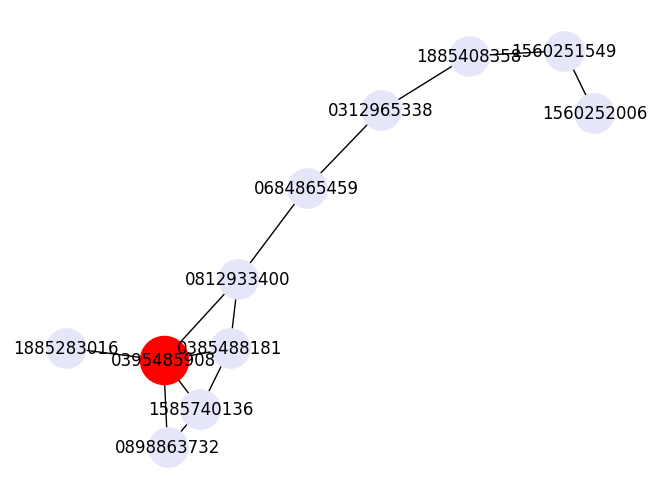

In [49]:
print("Looking for Recommendations for Customer Purchasing this Book: ")
print("---------------------------------------------------------------")
Purchased_ASIN = '0395485908'
print("ASIN = ", Purchased_ASIN)
print("title = ", books_dict[Purchased_ASIN]['title'])
print("salesrank = ", books_dict[Purchased_ASIN]['salesrank'])
print("tot_reviews = ", books_dict[Purchased_ASIN]['tot_reviews'])
print("avg_rating = ", books_dict[Purchased_ASIN]['avg_rating'])
print("degree_centrality = ", books_dict[Purchased_ASIN]['degree_centrality'])
print("clustering_coeff = ", books_dict[Purchased_ASIN]['clustering_coeff'])
print()
res1 = find_recommendation(Copurchase_Graph,query_id = Purchased_ASIN, thres = 0.5,top_n = 5)

In [ ]:
print(sorted(Copurchase_Graph.degree, key=lambda x: x[1], reverse=True)[:5])


[('0890420254', 312), ('1557987912', 252), ('0486291138', 224), ('0684801523', 223), ('0805047905', 213)]


In [ ]:
books_dict['0890420254']

{'Id': '458358',
 'title': 'Diagnostic and Statistical Manual of Mental Disorders DSM-IV-TR (Text Revision) (Diagnostic and Statistical Manual of Mental Disorders)',
 'group': 'Book',
 'categories': 'bodi refer subject profession counsel psycholog health intern specialti psychiatri ill mental general technic medic book mind medicin',
 'connections': '0890420270 0963382136 1585620599 0898625688 0890420262',
 'salesrank': 371,
 'tot_reviews': 35,
 'avg_rating': 4.0,
 'degree_centrality': 0,
 'clustering_coeff': 0.59,
 'DegreeCentrality': 312}

degree: how many edges a book has

The degree of a book's node measures how many other books it was purchased alongside with

the degree doesn’t take into account details of individual edges

Does a given edge connect to an otherwise isolated node or to a node that is connected with the entire network? Google’s PageRank algorithm aggregates this information to gauge how “important” a node is in a network.

The PageRank metric can be interpreted as an agent moving randomly from one node to another. Better-connected nodes have more paths leading through them, so the agent will tend to visit them more often.



In [ ]:
pageranks = nx.pagerank(Copurchase_Graph) # A dictionary
print(sorted(pageranks, key=lambda x: x[1], reverse=True)[:5])

['0932081258', '0929587200', '0954264851', '0971170924', '1930618034']


In [ ]:
books_dict['0932081258']

{'Id': '108453',
 'title': "Prayers That Prevail: The Believer's Manual of Prayers",
 'group': 'Book',
 'categories': 'subject religion inspir devot prayerbook worship christian book spiritu',
 'connections': '0892749504 0932081673 1577941829',
 'salesrank': 265036,
 'tot_reviews': 3,
 'avg_rating': 5.0,
 'degree_centrality': 0,
 'clustering_coeff': 0.58,
 'DegreeCentrality': 3}

In [ ]:
from networkx.algorithms.community.label_propagation import label_propagation_communities

communities = label_propagation_communities(Copurchase_Graph)

In [ ]:
print([community for community in communities][:5])

[{'0687336481', '0817013032', '0800627733', '0817012206', '1579105556', '0827229534', '0687006325', '0800629272', '1581342640', '0195098293', '0800628411', '0664222641', '0687173094', '0800620968', '0687186927', '082721619X', '0687005442', '0800629973', '0827204809', '0687179246', '0687045169', '0893672041', '082641060X', '0827200269', '0805415505', '0800632435', '0827227175', '0802841562', '0687047447', '156101074X', '0687099528', '0802806163', '0281052859', '1579108881', '0802842623', '0804215715', '0802846092', '0802801323', '0801090598', '1556735731', '0687074231', '0827242395', '0687085292', '0664256171', '0825441145', '0664256589', '0801070961', '066421942X', '0687023955', '0310237262', '0827234392', '0687085934', '066425540X', '0310237270', '0664221912', '0687186943', '0664251587', '082720230X'}, {'0866941029', '0802806279', '0801090660', '0310510910', '0805416269', '0805460853', '0785212213', '0785249141', '1581342624', '0310246563', '0877846049', '0877884412', '0849909082', '0

communities: groups of nodes that are highly connected to each other but minimally connected with nodes outside their community.

One of the most famous is label propagation. In it, each node starts with a unique label, in a community of one. The labels of the nodes are iteratively updated according to the majority of the labels of the neighboring nodes.

In [ ]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("booksSpark").getOrCreate()


ModuleNotFoundError: ignored

In [ ]:
reviews = spark.read.json("/content/drive/Shareddrives/DATA 245 Team 6/Datasets/Books_rating_category.json")

# show the first 10 rows of the DataFrame
reviews.show(10)

NameError: ignored

In [ ]:
reviews = reviews.drop("reviewerID")
reviews = reviews.drop("_corrupt_record")

In [ ]:
reviews.printSchema()

root
 |-- asin: string (nullable = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- summary: string (nullable = true)



In [ ]:
book_review_asin = reviews.select("asin").distinct().rdd.map(lambda r: r.asin).collect()
len(book_review_asin)

190204

In [ ]:
books_meta_spark =spark.createDataFrame(books)
books_meta_spark.printSchema()
books_meta_spark.show()

root
 |-- asin: string (nullable = true)
 |-- Id: long (nullable = true)
 |-- title: string (nullable = true)
 |-- group: string (nullable = true)
 |-- categories: string (nullable = true)
 |-- connections: string (nullable = true)
 |-- salesrank: long (nullable = true)
 |-- tot_reviews: long (nullable = true)
 |-- avg_rating: double (nullable = true)
 |-- clustering_coeff: double (nullable = true)
 |-- DegreeCentrality: long (nullable = true)

+----------+---+--------------------+-----+--------------------+--------------------+---------+-----------+----------+----------------+----------------+
|      asin| Id|               title|group|          categories|         connections|salesrank|tot_reviews|avg_rating|clustering_coeff|DegreeCentrality|
+----------+---+--------------------+-----+--------------------+--------------------+---------+-----------+----------+----------------+----------------+
|0827229534|  1|Patterns of Preac...| Book|subject religion ...|0804215715 156101...|   3965

In [ ]:
train_sample = train.sample(n=2000)
len(train_sample['asin'].values)

2000

In [ ]:
train_spark =spark.createDataFrame(train_sample)

In [ ]:
train_nx_reviews = train_spark.join(reviews,['asin'],"inner")

In [ ]:
train_nx_reviews_asin = train_nx_reviews.select('asin').distinct().collect()
len(train_nx_reviews_asin)

241

In [ ]:
common_train_asin = set(train_sample['asin'].values).intersection(book_review_asin)
len(common_train_asin)

241

In [ ]:
print((train_nx_reviews.count(), len(train_nx_reviews.columns)))


(6528, 14)


In [ ]:
train_nx_reviews_df = train_nx_reviews.toPandas()
train_nx_reviews_df.shape

(6528, 14)

In [ ]:
train_nx_reviews_df['summary_review'] = train_nx_reviews_df['summary'] + ": " + train_nx_reviews_df['reviewText']

In [ ]:
max_length = train_nx_reviews_df["summary_review"].str.len().max()
max_length

20110

In [ ]:
train_nx_reviews_df['summary'].str.len().max()

128

In [ ]:
train_nx_reviews_full = train_nx_reviews_df.drop(['reviewText','summary'],axis=1)

In [ ]:
core_columns = ['asin', 'Id', 'title', 'group', 'categories', 'connections',
       'salesrank', 'tot_reviews', 'avg_rating', 'clustering_coeff',
       'DegreeCentrality']

In [ ]:
train_nx_reviews_combined = train_nx_reviews_full.groupby(core_columns).agg({'summary_review':lambda x: ' ### '.join(x)}).reset_index()
train_nx_reviews_combined.head()

,asin,Id,title,group,categories,connections,salesrank,tot_reviews,avg_rating,clustering_coeff,DegreeCentrality,summary_review
0,0007120214,146001,Natural Witchcraft: The Timeless Arts and Craf...,Book,spiritu subject religion witchcraft base age n...,0007133235 0919345808 0007145438 0738703184,235177,8,4.0,0.40,6,FINALLY an alternative to 101s and Wicca!: In ...
1,002522610X,443288,"Cassell's French Dictionary: French-English, E...",Book,refer subject english french instruct thesauru...,0025229303 0025229109 0025225405 0395359686 00...,1327606,7,2.5,0.77,5,Some of you are younger than this dictionary: ...
2,0028643909,334179,Does Your Broker Owe You Money?,Book,store invest financ jp general subject profess...,0793145554 0966398904,517886,13,4.0,1.00,2,An excellent primer for individual investors: ...
3,0028643992,122245,The Complete Idiot's Guide(R) to Private Inves...,Book,subject enforc profession social nonfict scien...,0965236943 0873647203 0028628217 0873646371 04...,7992,18,4.5,0.74,30,One of the best!: As an experienced Private In...
4,0060174722,476367,Mars and Venus on a Date: A Guide for Navigati...,Book,counsel psycholog relat seek general romanc mi...,006016848X 0060930276 0060927933 0060926619 00...,253583,96,4.0,0.93,5,Moronic: Whatever credibility John Gray had is...


In [ ]:
num_books_ve = train_nx_reviews_combined.shape[0]
num_books_ve

241

# LLM

In [ ]:
import pandas as pd
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import DataFrameLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.llms import LlamaCpp
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.callbacks.manager import CallbackManager
from langchain.memory import ConversationSummaryMemory
from langchain.chains import ConversationalRetrievalChain
from langchain.prompts import PromptTemplate
from langchain.prompts.chat import (
    ChatPromptTemplate,
    SystemMessagePromptTemplate,
    AIMessagePromptTemplate,
    HumanMessagePromptTemplate,
)
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
from transformers import pipeline
import textwrap
from pprint import pprint

In [ ]:
question_loader = DataFrameLoader(train_nx_reviews_combined, page_content_column="summary_review")
question_data = question_loader.load()

splitter = RecursiveCharacterTextSplitter(
                                          chunk_size=max_length,
                                          chunk_overlap=400)
texts = splitter.split_documents(question_data)

embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2")

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
db = FAISS.from_documents(texts, embeddings)


In [ ]:
%ls

In [ ]:
db.save_local(f"train_{num_books_ve}_books_summary_review_db")

In [ ]:
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    model_kwargs = {'device': 'cpu'})

sr_db = FAISS.load_local(f"train_269_books_summary_review_db", embeddings)

In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
# text wrapping function
def wrap(x):
  return textwrap.fill(x, replace_whitespace = False, fix_sentence_endings = True)

In [ ]:
docs = sr_db.similarity_search("cooking with an airfryer")
len(docs)

4

Your max_length is set to 20, but your input_length is only 11. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=5)
Your max_length is set to 20, but your input_length is only 8. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=4)
Your max_length is set to 20, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 20, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length


0671796291
Looking for Recommendations for Customer Purchasing this Book: 
---------------------------------------------------------------
ASIN =  0671796291
title =  The Black Family Reunion Cookbook : Recipes and Food Memories
salesrank =  187711
tot_reviews =  10
avg_rating =  4.0
degree_centrality =  0
clustering_coeff =  0.69

Top 5 recommendations by average rating & total reviews from users who have purchased 'The Black Family Reunion Cookbook : Recipes and Food Memories' 


,asin,title,salesrank,tot_reviews,avg_rating,degree_centrality,clustering_coeff
0,0807847909,Mama Dip's Kitchen,29477,25,5.0,0,0.73
1,0060187166,Soul Food : Recipes and Reflections from Afric...,303536,6,5.0,0,0.64
2,0688162193,Sylvia's Family Soul Food Cookbook : From Hemi...,121760,24,4.5,0,0.58
3,0802132839,Soul Food: Classic Cuisine from the Deep South,100360,14,4.5,0,0.80
4,1559723254,The African-American Heritage Cookbook: Tradit...,155953,9,4.5,0,0.83


Your max_length is set to 20, but your input_length is only 19. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)



0446394920
Looking for Recommendations for Customer Purchasing this Book: 
---------------------------------------------------------------
ASIN =  0446394920
title =  Compassionate Cook : Please don't Eat the Animals
salesrank =  223562
tot_reviews =  22
avg_rating =  4.5
degree_centrality =  0
clustering_coeff =  0.6



0679434631
Looking for Recommendations for Customer Purchasing this Book: 
---------------------------------------------------------------
ASIN =  0679434631
title =  The Dean and DeLuca Cookbook
salesrank =  270854
tot_reviews =  23
avg_rating =  5.0
degree_centrality =  0
clustering_coeff =  0.0

Top 5 recommendations by average rating & total reviews from users who have purchased 'The Dean and DeLuca Cookbook' 


,asin,title,salesrank,tot_reviews,avg_rating,degree_centrality,clustering_coeff
0,0393020436,The Zuni Cafe Cookbook: A Compendium of Recipe...,14076,22,4.5,0,0.23
1,037575265X,Taste : One Palate's Journey Through the World...,453240,17,4.5,0,0.00
2,0060170131,Union Square Cafe Cookbook Ri : 160 Favorite R...,42093,11,4.5,0,0.34


Your max_length is set to 20, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 20, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 20, but your input_length is only 13. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=6)
Your max_length is set to 20, but your input_length is only 18. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=9)
Your max_len


0425176746
Looking for Recommendations for Customer Purchasing this Book: 
---------------------------------------------------------------
ASIN =  0425176746
title =  The Cat Who... Cookbook : Delicious Meals and Menus Inspired By Lilian Jackson Braun (Cat Who...)
salesrank =  401375
tot_reviews =  10
avg_rating =  4.5
degree_centrality =  0
clustering_coeff =  0.0




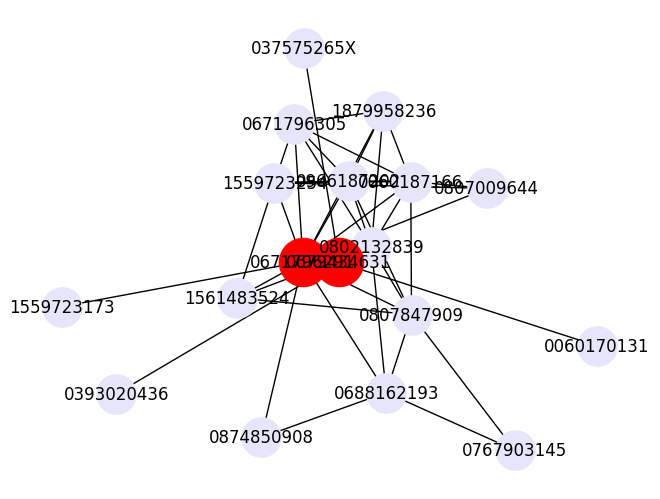

In [ ]:
for d in docs:
  summs = [summarizer(i,min_length=10, max_length=20)[0]['summary_text'] for i in d.page_content.split(" ### ")]
  #review_summary = summarizer(" ".join(summs))[0]['summary_text']
  #print(review_summary)
  #print(d.metadata)
  print()
  try:
    print(str(d.metadata['asin']))
    print("Looking for Recommendations for Customer Purchasing this Book: ")
    print("---------------------------------------------------------------")
    Purchased_ASIN = d.metadata['asin']
    print("ASIN = ", Purchased_ASIN)
    print("title = ", books_dict[Purchased_ASIN]['title'])
    print("salesrank = ", books_dict[Purchased_ASIN]['salesrank'])
    print("tot_reviews = ", books_dict[Purchased_ASIN]['tot_reviews'])
    print("avg_rating = ", books_dict[Purchased_ASIN]['avg_rating'])
    print("degree_centrality = ", books_dict[Purchased_ASIN]['degree_centrality'])
    print("clustering_coeff = ", books_dict[Purchased_ASIN]['clustering_coeff'])
    print()
    find_recommendation(Copurchase_Graph,query_id = Purchased_ASIN, thres = 0.5,top_n = 5)
  except:
    pass
  print()

In [ ]:
retriever = sr_db.as_retriever(
    search_type="mmr",  # Also test "similarity"
    search_kwargs={"k": 3},
)

In [ ]:
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])

llm = LlamaCpp(
  model_path="/content/drive/Shareddrives/DATA 298A Team 7/LLMs/llama-2-7b-chat.Q4_K_M.gguf",
  n_ctx=5000,
  n_gpu_layers=10,
  n_batch=512,
  f16_kv=True,  # MUST set to True, otherwise you will run into problem after a couple of calls
  callback_manager=callback_manager,
  verbose=True,
  )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
from langchain.chains.question_answering import load_qa_chain

# Prompt
template = """Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer and wish the user a happy reading.

{context}
Question: {question}
Answer:{key}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate(
    input_variables=["context", "question", "key", "summaries"],
    template=template,
)

In [ ]:
question = 'What are some interesting books about traveling?'

docs = retriever.get_relevant_documents(question)
docs[0].page_content

"great book: very funny easy read novel following two friends as they travel back in time to the middle ages where they find themselves in the bodies of people/animals who lived at the time. ### Perfect for Young Readers!: I remember reading this book when I was young.. and I have read it several times since.  It is fun, witty, charming and covers everything from time travel to jousting to courtly love.  It's great for boys or girls!  A definate must!"

In [ ]:
 # Chain
chain = load_qa_chain(llm, chain_type="stuff", prompt=QA_CHAIN_PROMPT, verbose=True)

#key:
key = summs

# Run
chain({"input_documents": docs, "question": question, "key": key})



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Use the following pieces of context to answer the question at the end.
If you don't know the answer, just say that you don't know, don't try to make up an answer.
Use three sentences maximum and keep the answer as concise as possible.
Always say "thanks for asking!" at the end of the answer and wish the user a happy reading.

great book: very funny easy read novel following two friends as they travel back in time to the middle ages where they find themselves in the bodies of people/animals who lived at the time. ### Perfect for Young Readers!: I remember reading this book when I was young.. and I have read it several times since.  It is fun, witty, charming and covers everything from time travel to jousting to courtly love.  It's great for boys or girls!  A definate must!

Excellent: Roger Tory Peterson and James Fisher wrote a very enjoyable book about their birding across America